# EDA

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("./cleaned_data.csv")

In [83]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,False,False,False,False,False,False


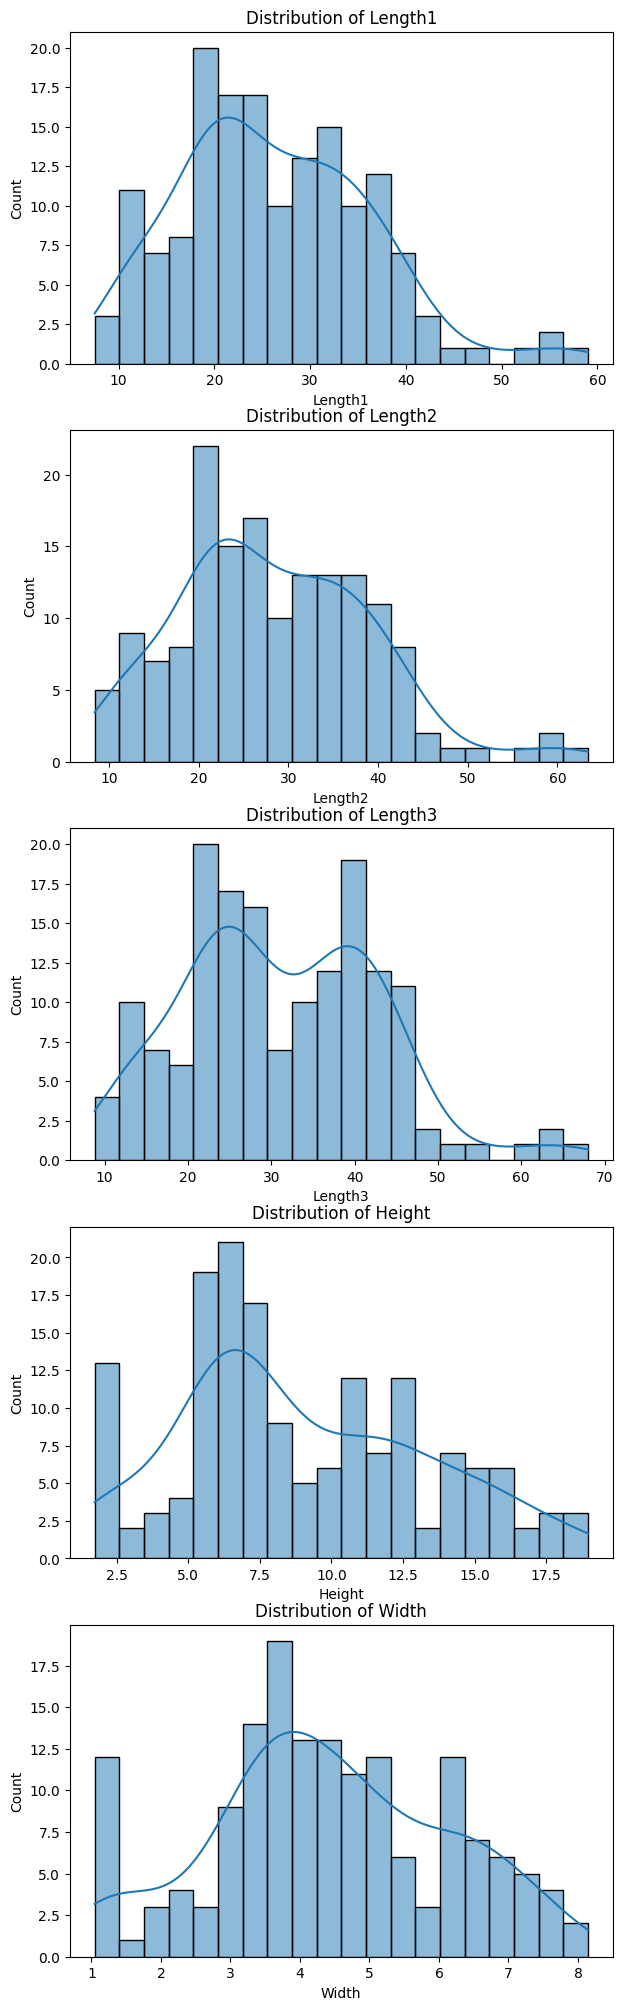

In [84]:
figure = plt.figure(figsize =(7, 25))

plt.subplot(5, 1, 1)
sns.histplot(df['Length1'],bins=20,kde=True)
plt.title("Distribution of Length1")

plt.subplot(5, 1, 2)
sns.histplot(df['Length2'],bins=20,kde=True)
plt.title("Distribution of Length2")

plt.subplot(5, 1, 3)
sns.histplot(df["Length3"],bins=20,kde=True)
plt.title("Distribution of Length3")

plt.subplot(5, 1, 4)
sns.histplot(df["Height"],bins=20,kde=True)
plt.title("Distribution of Height")

plt.subplot(5, 1, 5)
sns.histplot(df["Width"],bins=20,kde=True)
plt.title("Distribution of Width")

plt.show()

In [85]:
print(f"Mean of Length1: {df["Length1"].mean()}\nStandard Deviation of Length1: {df["Length1"].std()}\nSkewness of Length1: {df["Length1"].skew()}")

Mean of Length1: 26.247169811320756
Standard Deviation of Length1: 9.996441210553128
Skewness of Length1: 0.5884823308370954


In [86]:
print(f"Mean of Length2: {df["Length2"].mean()}\nStandard Deviation of Length2: {df["Length2"].std()}\nSkewness of Length2: {df["Length2"].skew()}")

Mean of Length2: 28.415723270440253
Standard Deviation of Length2: 10.716328098884247
Skewness of Length2: 0.5398630565804722


In [87]:
print(f"Mean of Length3: {df["Length3"].mean()}\nStandard Deviation of Length3: {df["Length3"].std()}\nSkewness of Length3: {df["Length3"].skew()}")

Mean of Length3: 31.227044025157234
Standard Deviation of Length3: 11.610245832690964
Skewness of Length3: 0.39154084789678356


In [88]:
print(f"Mean of Height: {df["Height"].mean()}\nStandard Deviation of Height: {df["Height"].std()}\nSkewness of Height: {df["Height"].skew()}")

Mean of Height: 8.970993710691824
Standard Deviation of Height: 4.2862076199688675
Skewness of Height: 0.39718636256683026


In [89]:
print(f"Mean of Width: {df["Width"].mean()}\nStandard Deviation of Width: {df["Width"].std()}\nSkewness of Width: {df["Width"].skew()}")

Mean of Width: 4.417485534591195
Standard Deviation of Width: 1.685803869992167
Skewness of Width: 0.00497224623809981


Fixing Skewness is not that important for this dataset

### Countplot for Categorical Features

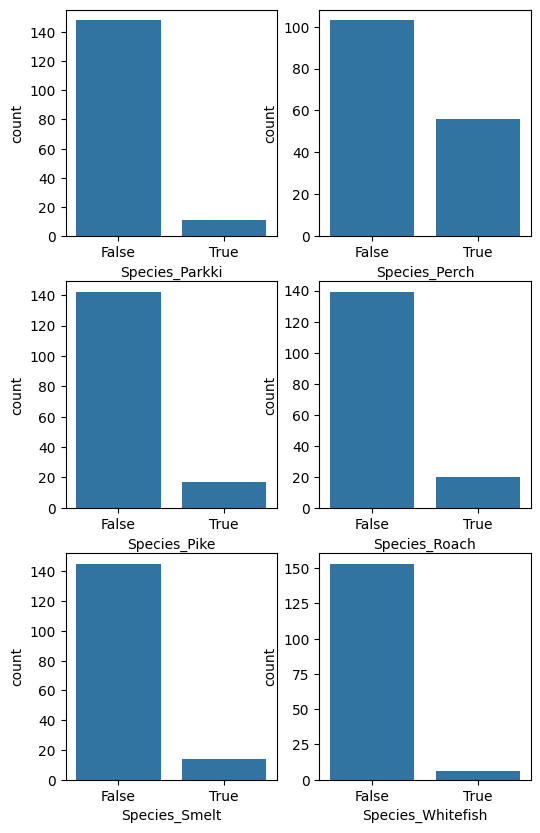

In [90]:
fig = plt.figure(figsize=(6,10))

plt.subplot(3, 2, 1)
sns.countplot(data=df, x=df.columns[6])

plt.subplot(3, 2, 2)
sns.countplot(data=df, x=df.columns[7])

plt.subplot(3, 2, 3)
sns.countplot(data=df, x=df.columns[8])

plt.subplot(3, 2, 4)
sns.countplot(data=df, x=df.columns[9])

plt.subplot(3, 2, 5)
sns.countplot(data=df, x=df.columns[10])

plt.subplot(3, 2, 6)
sns.countplot(data=df, x=df.columns[11])

plt.show()

### Bivariate Analysis

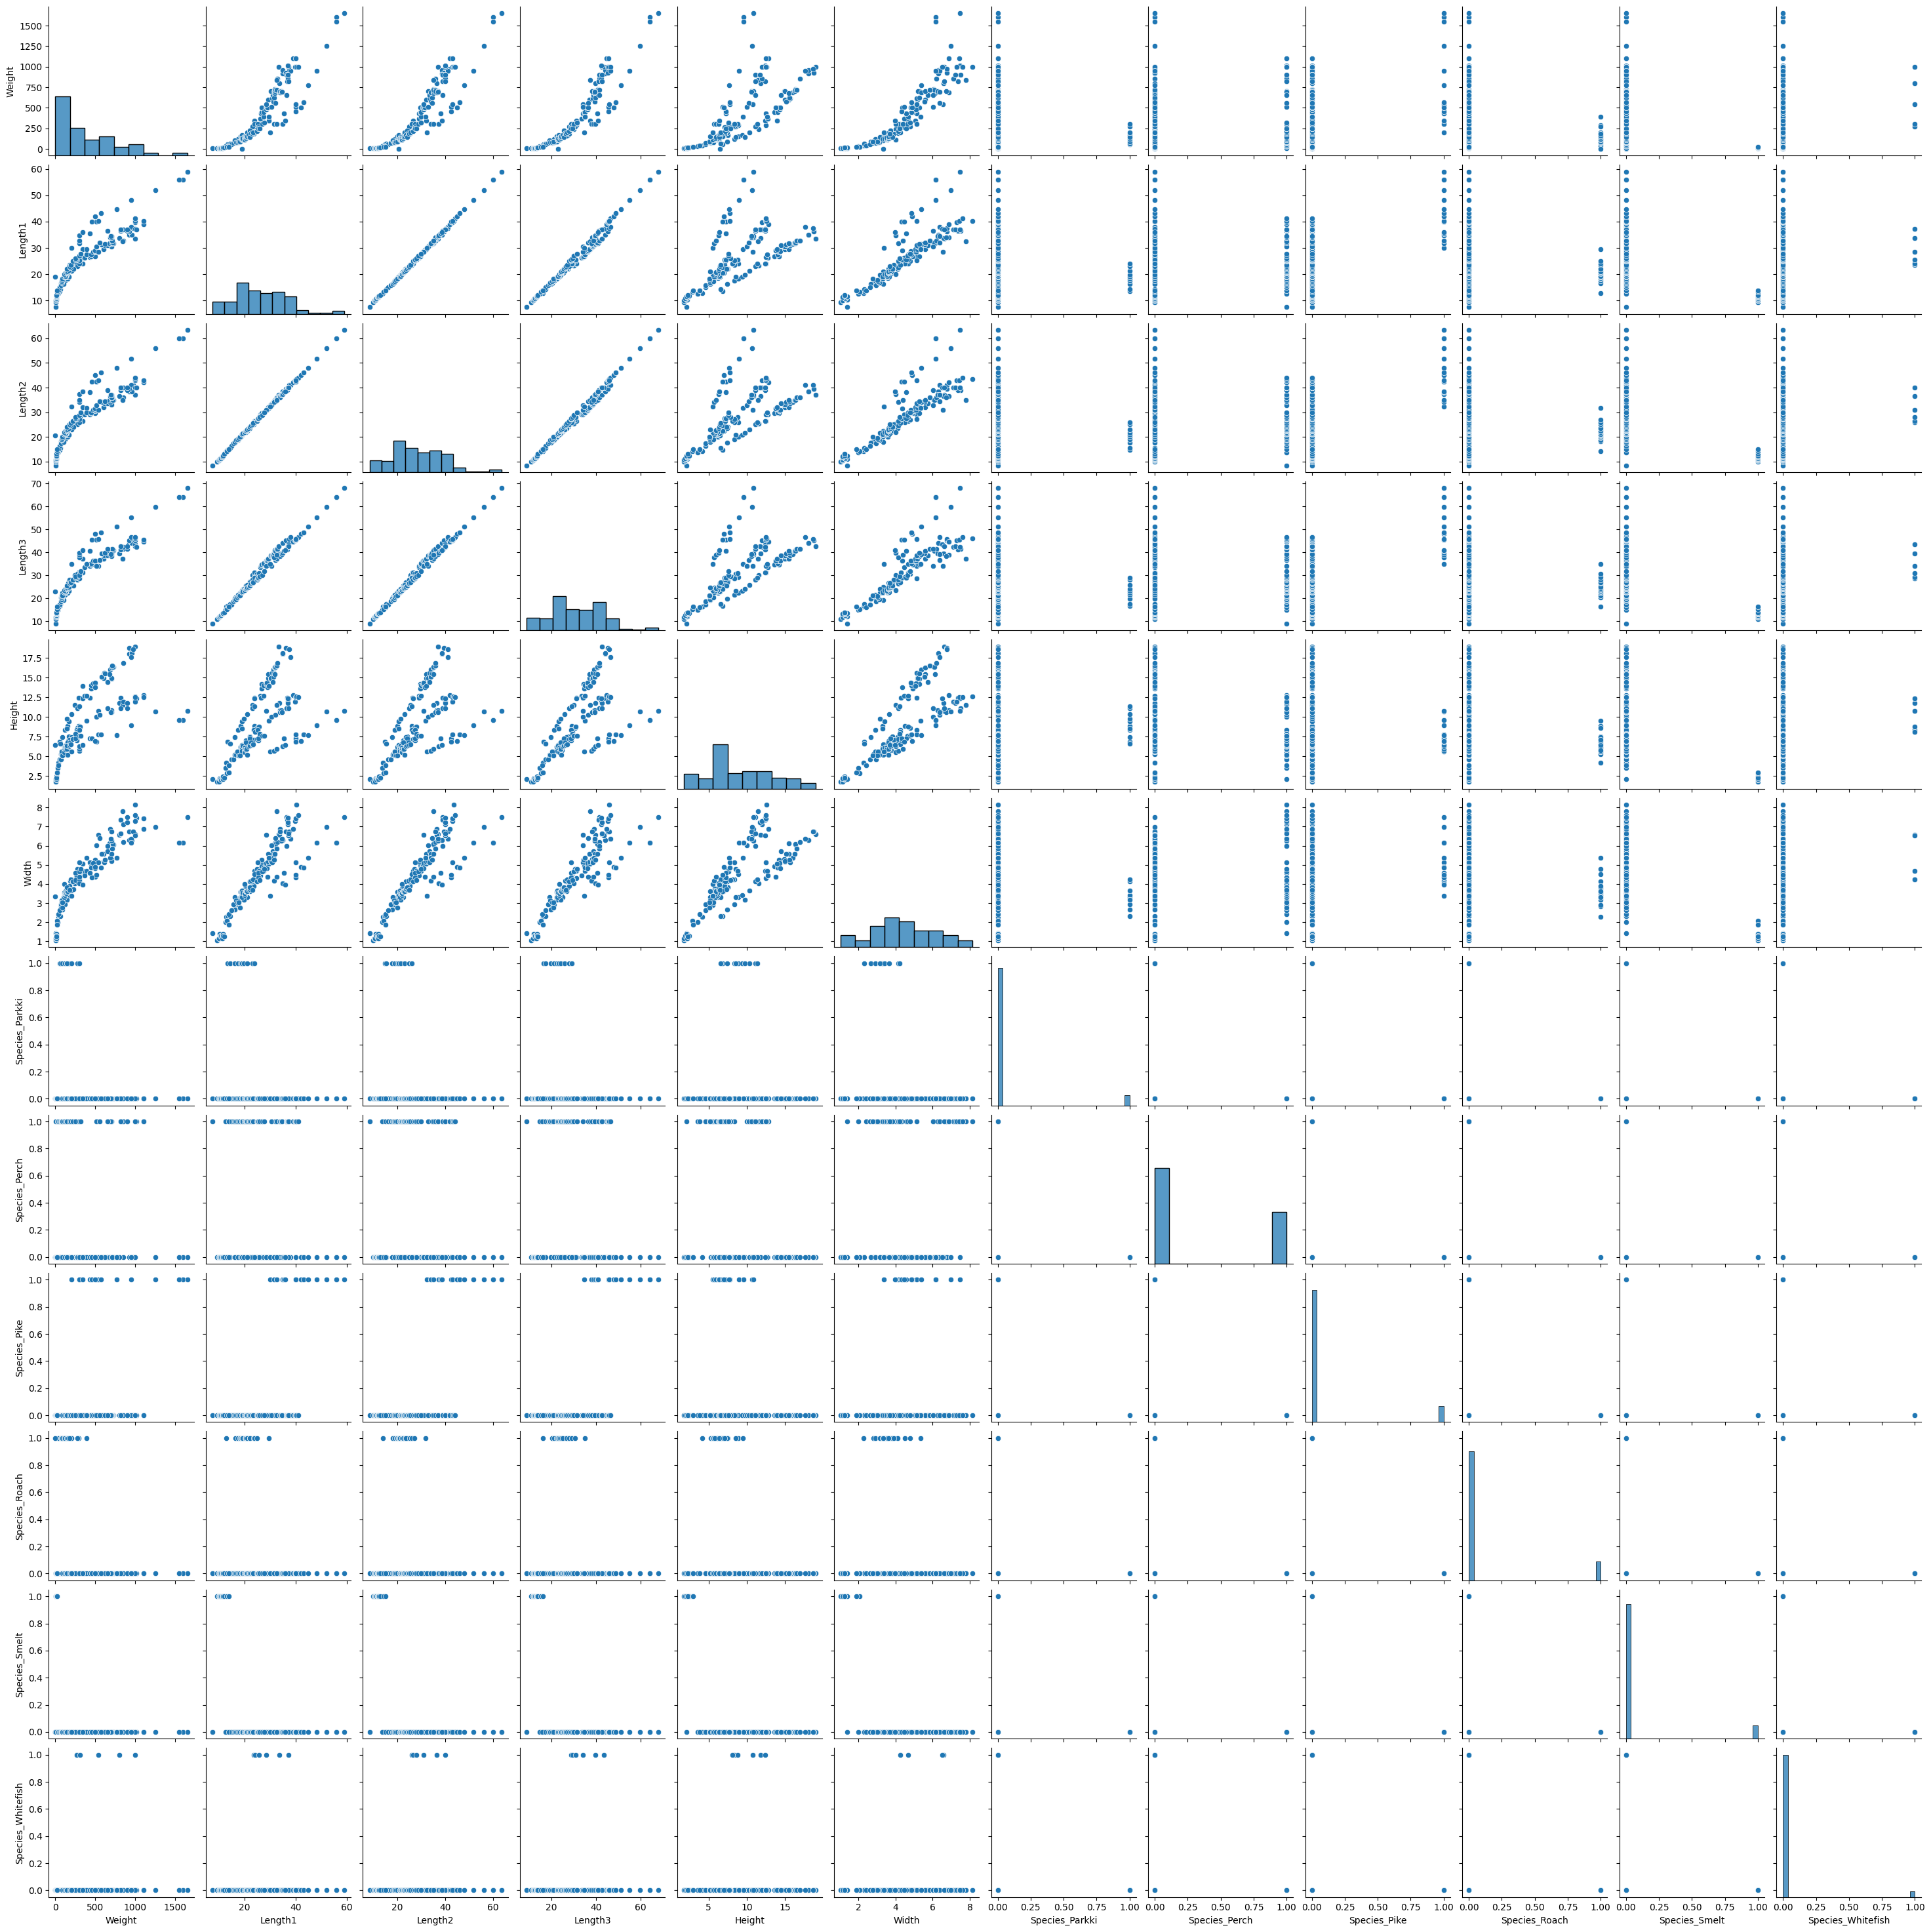

In [91]:
columns = df.columns

sns.pairplot(df[columns])

plt.show()

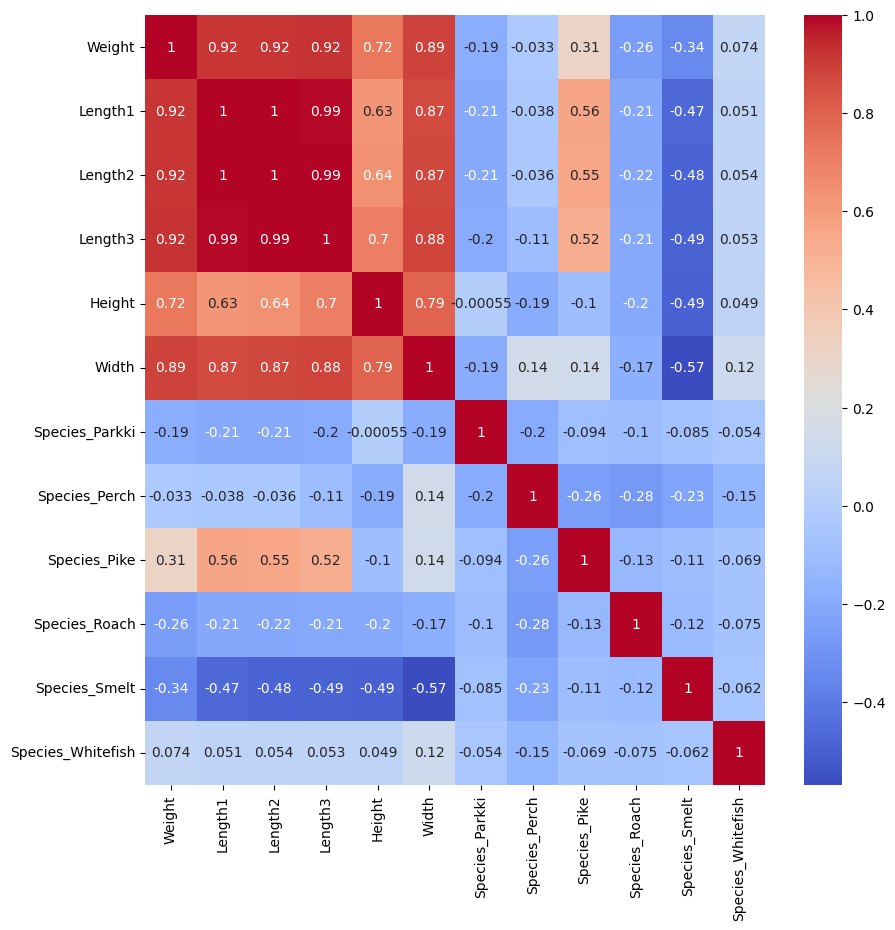

In [92]:
fig = plt.figure(figsize=(10, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')

plt.show()

Length1, 2 and 3 have high positive correlation. Dropping Length2 and Length3

In [93]:
df = df.drop(columns=["Length2", "Length3"])

In [94]:
df.head()

,Weight,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,11.5200,4.0200,False,False,False,False,False,False
1,290.0,24.0,12.4800,4.3056,False,False,False,False,False,False
2,340.0,23.9,12.3778,4.6961,False,False,False,False,False,False
3,363.0,26.3,12.7300,4.4555,False,False,False,False,False,False
4,430.0,26.5,12.4440,5.1340,False,False,False,False,False,False


### Outlier Handling

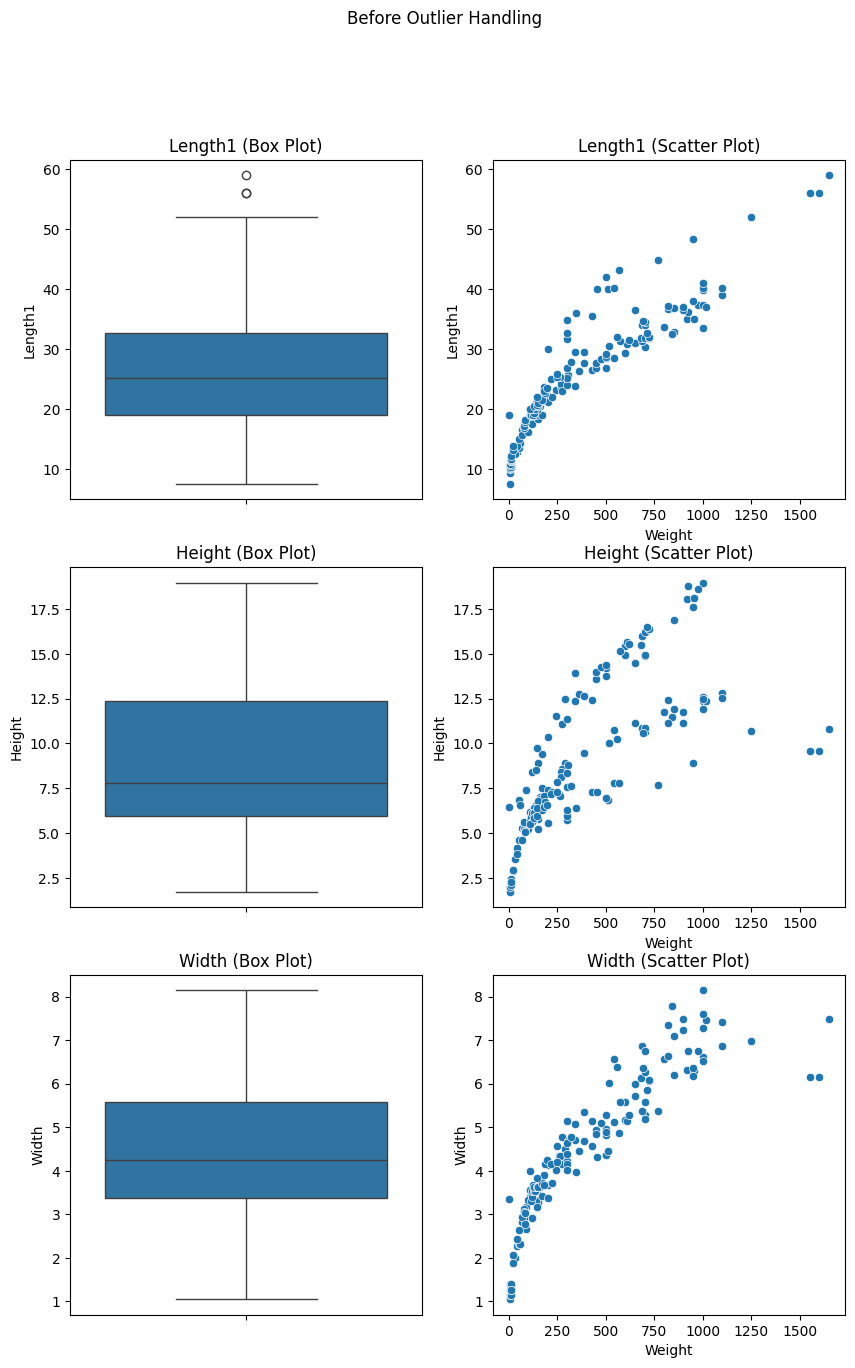

In [95]:
fig = plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
sns.boxplot(df, y="Length1")
plt.title("Length1 (Box Plot)")

plt.subplot(3,2,3)
sns.boxplot(df, y="Height")
plt.title("Height (Box Plot)")

plt.subplot(3,2,5)
sns.boxplot(df, y="Width")
plt.title("Width (Box Plot)")

plt.subplot(3,2,2)
sns.scatterplot(df, y="Length1", x="Weight")
plt.title("Length1 (Scatter Plot)")

plt.subplot(3,2,4)
sns.scatterplot(df, y="Height", x="Weight")
plt.title("Height (Scatter Plot)")

plt.subplot(3,2,6)
sns.scatterplot(df, y="Width", x="Weight")
plt.title("Width (Scatter Plot)")

plt.suptitle("Before Outlier Handling")

plt.show()

In [96]:
df_edit = df.copy()

In [97]:
median = df["Length1"].median()

q1 = df["Length1"].quantile(0.25)
q3 = df["Length1"].quantile(0.75)
iqr = q3 - q1       # Inter Quartile Range

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

df_edit.loc[df_edit["Length1"]>upper_bound, "Length1"] = upper_bound
df_edit.loc[df_edit["Length1"]<lower_bound, "Length1"] = lower_bound

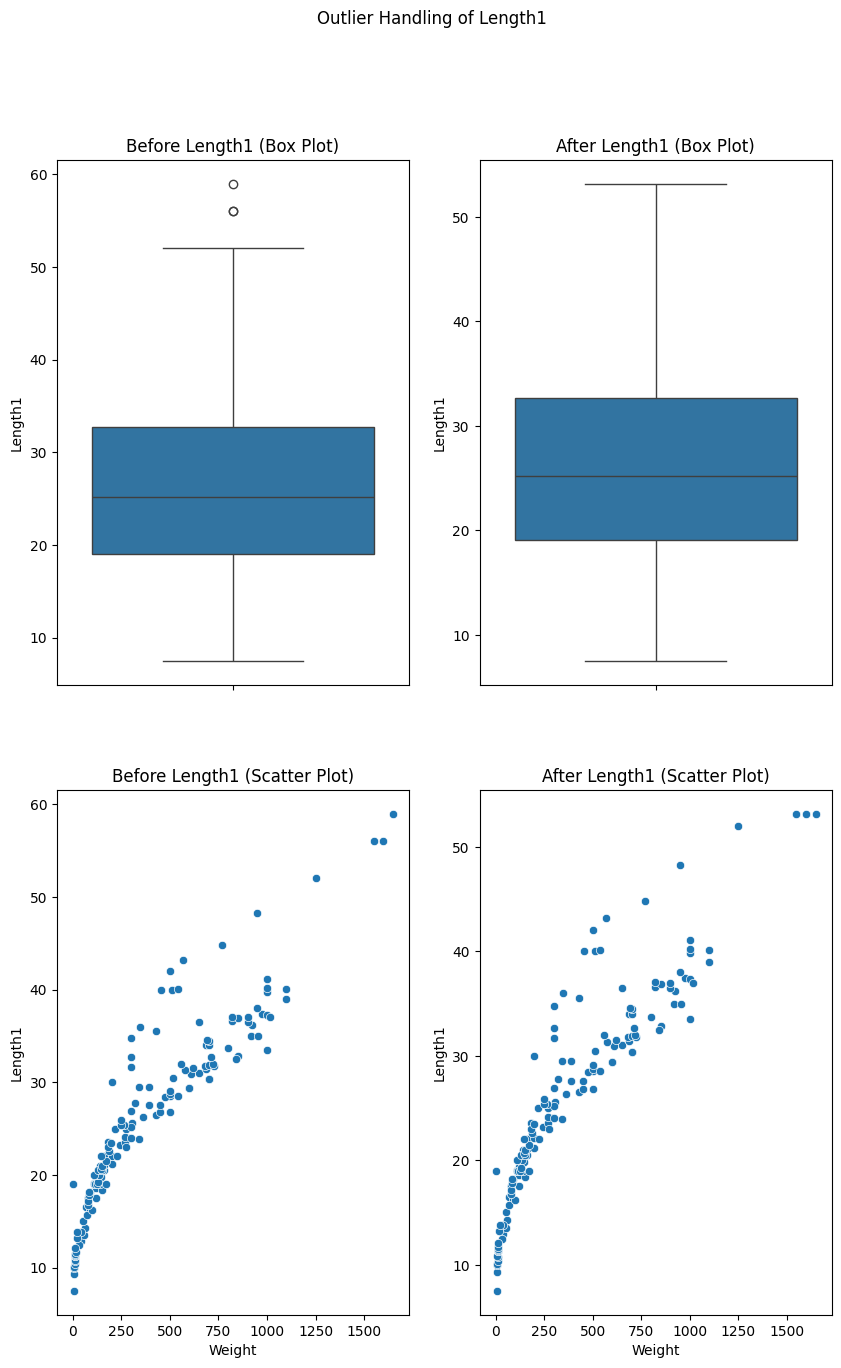

In [98]:
fig = plt.figure(figsize=(10,15))

plt.subplot(2,2,1)
sns.boxplot(df, y="Length1")
plt.title("Before Length1 (Box Plot)")

plt.subplot(2,2,2)
sns.boxplot(df_edit, y="Length1")
plt.title("After Length1 (Box Plot)")

plt.subplot(2,2,3)
sns.scatterplot(df, y="Length1", x="Weight")
plt.title("Before Length1 (Scatter Plot)")

plt.subplot(2,2,4)
sns.scatterplot(df_edit, y="Length1", x="Weight")
plt.title("After Length1 (Scatter Plot)")

plt.suptitle("Outlier Handling of Length1")

plt.show()

In [99]:
df_edit.to_csv("./train.csv", index=False)